In [2]:
# import important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("default")

In [33]:
# Load merged training data

train = pd.read_csv("../data/processed_data/train_merged.csv")
test = pd.read_csv("../data/processed_data/test_merged.csv")


print(df.shape)
df.head()

/var/folders/4y/jgs7sbvs2n92vmw0q53pv0580000gn/T/ipykernel_87111/1303470972.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/processed_data/train_merged.csv")


(844392, 25)


/var/folders/4y/jgs7sbvs2n92vmw0q53pv0580000gn/T/ipykernel_87111/1303470972.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("../data/processed_data/test_merged.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Day,CustomerGroup,CompetitionGroup,IsWeekend
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,4,31,501–1000,1001–2000 m,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,4,31,501–1000,501–1000 m,False
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,4,31,501–1000,5000+ m,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None,2015,7,4,31,1000+,501–1000 m,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None,2015,7,4,31,501–1000,5000+ m,False


In [34]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

Store                        0
CompetitionOpenSinceYear     0
CompetitionGroup             0
CustomerGroup                0
Day                          0
Week                         0
Month                        0
Year                         0
PromoInterval                0
Promo2SinceYear              0
Promo2SinceWeek              0
Promo2                       0
CompetitionOpenSinceMonth    0
DayOfWeek                    0
CompetitionDistance          0
Assortment                   0
StoreType                    0
SchoolHoliday                0
StateHoliday                 0
Promo                        0
Open                         0
Customers                    0
Sales                        0
Date                         0
IsWeekend                    0
dtype: int64

In [35]:
# Checking Duplicate 

print("Full row duplicates:", df.duplicated().sum())
print("Store-Date duplicates:", df.duplicated(subset=["Store", "Date"]).sum())

Full row duplicates: 0
Store-Date duplicates: 0


In [36]:
# Removing Cloased Store

df = df[df["Open"] == 1]
print("After removing closed stores:", df.shape)

After removing closed stores: (844392, 25)


In [37]:
# handeling missing value

# PromoInterval: missing means store not participating in Promo2
df["PromoInterval"] = df["PromoInterval"].fillna("None")

# Competition distance: use median (robust to outliers)
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(
    df["CompetitionDistance"].median()
)

# Competition open dates
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(0)
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].fillna(0)

# Promo2 start info
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(0)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(0)

In [38]:
# checking missing value after cleaning

df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Week                         0
Day                          0
CustomerGroup                0
CompetitionGroup             0
IsWeekend                    0
dtype: int64

In [39]:
# Checking Duplicates value after cleaning

print("Duplicates after cleaning:", df.duplicated().sum())
print(
    "Store-Date duplicates after cleaning:",
    df.duplicated(subset=["Store", "Date"]).sum()
)

Duplicates after cleaning: 0
Store-Date duplicates after cleaning: 0


In [40]:
# date conversion

df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.weekday
df["Day"] = df["Date"].dt.day

In [41]:
# Single-Variant EDA

# Sales Distribution

df['Sales'].describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

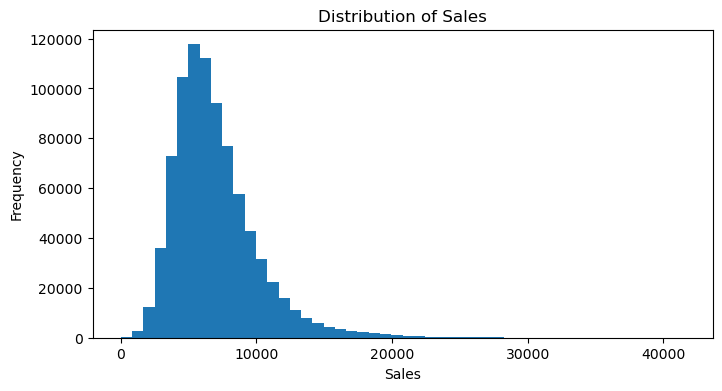

In [42]:
# Plot sales Distribution

plt.figure(figsize=(8,4))
plt.hist(df["Sales"], bins=50)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

The sales distribution plot is used to understand how daily sales values are spread across all stores and dates. It helps identify the typical sales range, the presence of extreme values, and whether the data is symmetric or skewed.

Before building any predictive model, it is essential to understand the behavior of the target variable (Sales). Models learn patterns based on this distribution. If sales are highly skewed or contain extreme values, it affects model choice, error metrics, and preprocessing decisions.

The histogram shows that sales are right-skewed, meaning most days have moderate sales while a small number of days have very high sales. These high values are not errors but represent high-performing stores or peak demand periods. This insight tells us that outliers should be handled carefully and not removed blindly, as they represent real business scenarios.

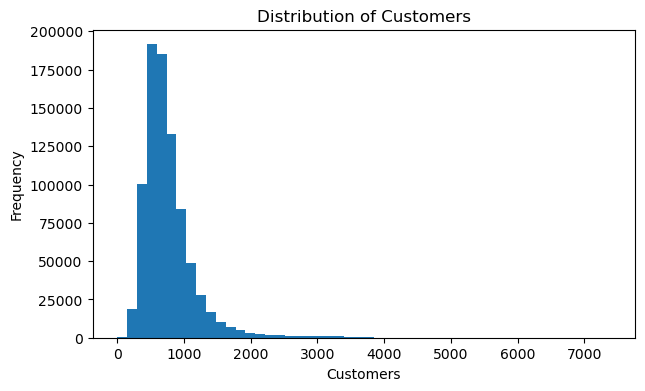

In [43]:
# Distribution of customer

plt.figure(figsize=(7,4))
plt.hist(df["Customers"], bins=50)
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.title("Distribution of Customers")
plt.show()

This plot shows how customer footfall is distributed across stores and days. It helps us understand whether most stores receive similar customer counts or if there are large variations.

Customers are a key driver of sales. Understanding their distribution helps determine whether customer behavior is stable or highly variable, which directly impacts sales prediction.

The customer distribution is also right-skewed, indicating that while most days have a moderate number of customers, some days experience very high footfall. These peaks often correspond to promotions, holidays, or popular store locations.

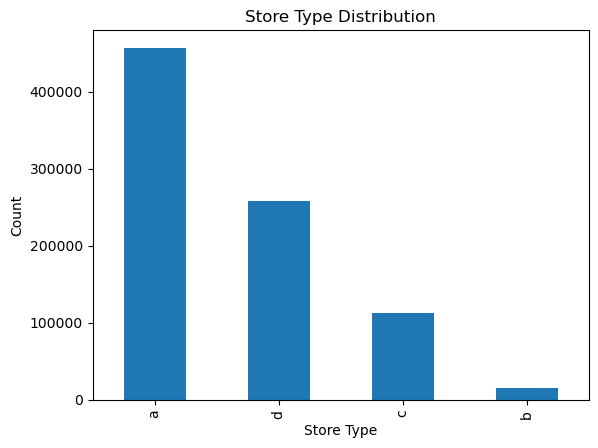

In [44]:
# StoreType

df["StoreType"].value_counts().plot(kind="bar")
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

The store type distribution plot shows how stores are categorized across different store types (a, b, c, d). It helps us understand how many stores belong to each type in the dataset.

Before analyzing sales performance, it is important to understand the structure of the retail network. Different store types represent different business models (for example, size, layout, or service strategy), and their distribution affects overall sales patterns and model learning.

The distribution shows that store types are not evenly distributed, with some store types appearing much more frequently than others. This imbalance indicates that certain store formats dominate the dataset, which can influence average sales trends and model bias if not properly considered.

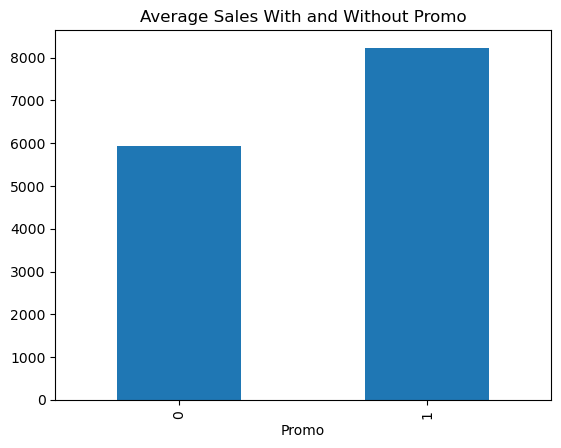

In [45]:
# Bi-Variant EDA

# promo vs sales

df.groupby("Promo")["Sales"].mean().plot(
    kind="bar",
    title="Average Sales With and Without Promo"
)
plt.show()

This plot compares the average sales on days with promotions (Promo = 1) and without promotions (Promo = 0). It helps evaluate the direct impact of promotional activities on store sales.

Promotions are a key business strategy used to attract customers and increase revenue. Before building a prediction model, it is important to understand whether promotions actually lead to higher sales or not. This analysis helps validate the importance of the Promo feature.

The bar chart shows that average sales are significantly higher on promotional days compared to non-promotional days. This indicates that promotions are effective in boosting sales, either by increasing customer footfall or encouraging higher purchase volumes.

Promotions have a strong positive effect on sales, making the Promo variable an important predictor for sales forecasting models.

/var/folders/4y/jgs7sbvs2n92vmw0q53pv0580000gn/T/ipykernel_87111/2374723528.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sales = df.groupby("CustomerGroup")["Sales"].mean()


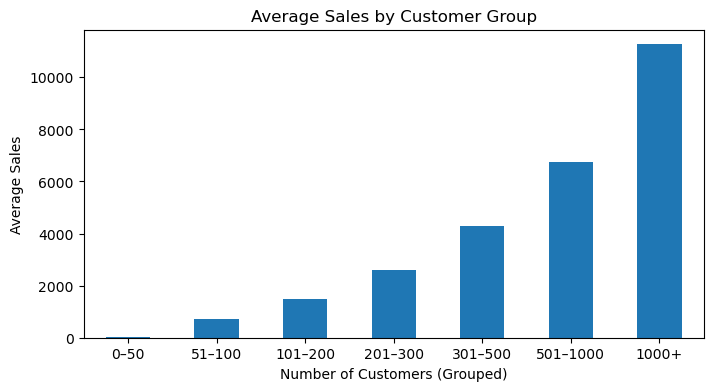

In [46]:
# customer vs sales

# Create simple customer ranges
customer_bins = [0, 50, 100, 200, 300, 500, 1000, df["Customers"].max()]
customer_labels = [
    "0–50", "51–100", "101–200", "201–300",
    "301–500", "501–1000", "1000+"
]

df["CustomerGroup"] = pd.cut(
    df["Customers"],
    bins=customer_bins,
    labels=customer_labels,
    include_lowest=True
)

# Calculate average sales per customer group
group_sales = df.groupby("CustomerGroup")["Sales"].mean()

# Plot
plt.figure(figsize=(8,4))
group_sales.plot(kind="bar")
plt.xlabel("Number of Customers (Grouped)")
plt.ylabel("Average Sales")
plt.title("Average Sales by Customer Group")
plt.xticks(rotation=0)
plt.show()

This plot analyzes the relationship between the number of customers and average sales by grouping customers into meaningful ranges.

A raw scatter plot was too noisy due to the large dataset. Grouping customers into ranges makes the relationship between customers and sales easier to interpret and communicate.

The bar chart shows a clear and consistent increase in average sales as customer count increases. This confirms that customer footfall is the strongest driver of sales, validating the inclusion of the Customers feature in predictive models.


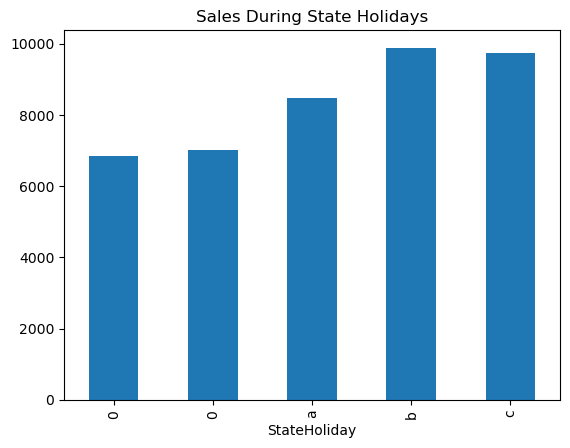

In [47]:
# holiday effect

df.groupby("StateHoliday")["Sales"].mean().plot(
    kind="bar",
    title="Sales During State Holidays"
)
plt.show()

This plot compares the average sales across different state holiday categories (StateHoliday). It helps analyze how public holidays affect store sales performance.

Sales behavior often changes during public holidays due to factors such as store closures, reduced operating hours, or changes in customer shopping patterns. Understanding the impact of state holidays helps determine whether holiday information is a meaningful feature for sales forecasting.

The bar chart shows that average sales are generally lower during state holidays compared to non-holiday days. This suggests that holidays often lead to reduced store activity, possibly due to closures or lower customer turnout.

Different holiday types may have varying impacts, indicating that not all holidays affect sales in the same way.

State holidays negatively impact sales, making the StateHoliday variable an important time-based feature for predicting daily sales.


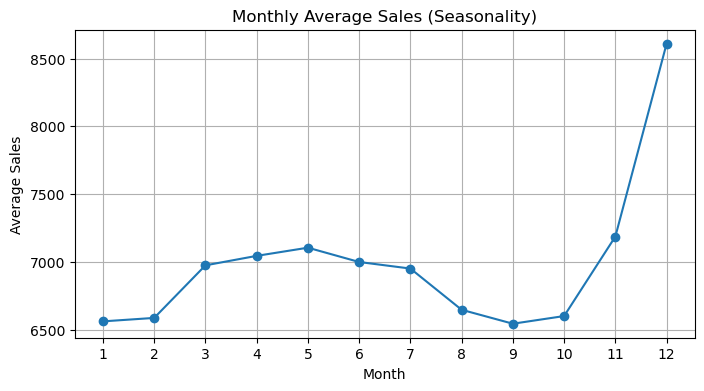

In [48]:
# Seasonality Analysis

# Calculate average sales for each month
monthly_sales = df.groupby("Month")["Sales"].mean()

# Create the plot
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind="line", marker="o")

# Add clear labels and title
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Monthly Average Sales (Seasonality)")

# Improve readability
plt.xticks(range(1, 13))
plt.grid(True)

# Show plot
plt.show()

This plot visualizes the average sales for each month of the year to identify seasonal patterns in customer purchasing behavior. It helps understand whether sales vary systematically across different months.

Sales in retail businesses often follow seasonal trends influenced by factors such as festivals, holidays, weather conditions, and consumer habits. Identifying seasonality is important for sales forecasting because models must account for these recurring patterns to make accurate predictions.

The line plot shows that average sales fluctuate across months, indicating the presence of seasonality in the data. Certain months consistently record higher sales, while others show lower averages. This confirms that sales are not uniformly distributed throughout the year.

The presence of clear seasonal patterns suggests that time-based features such as month and year are important predictors for sales forecasting models.


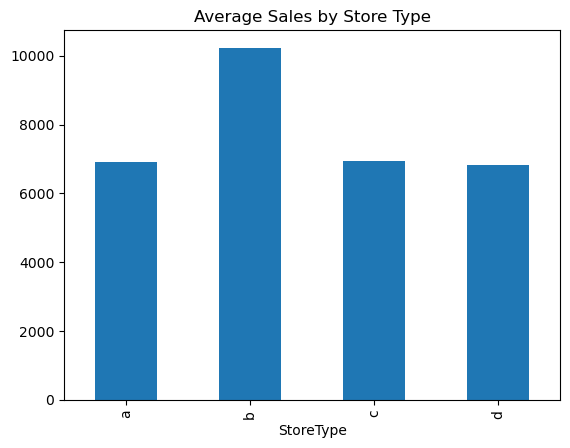

In [19]:
# Store Type vs Sales

df.groupby("StoreType")["Sales"].mean().plot(
    kind="bar",
    title="Average Sales by Store Type"
)
plt.show()

This plot compares the average sales across different store types. Each store type represents a different business format, such as variations in store size, layout, or service model.

Different store types are expected to perform differently due to structural and operational differences. Understanding how sales vary across store types helps identify whether store format is an important factor influencing sales and whether it should be included as a categorical feature in the prediction model.

The bar chart shows that average sales vary significantly across store types. Some store types consistently generate higher sales than others, indicating that store characteristics play a major role in sales performance.

Store type has a strong influence on sales, making it an important categorical feature for sales forecasting.

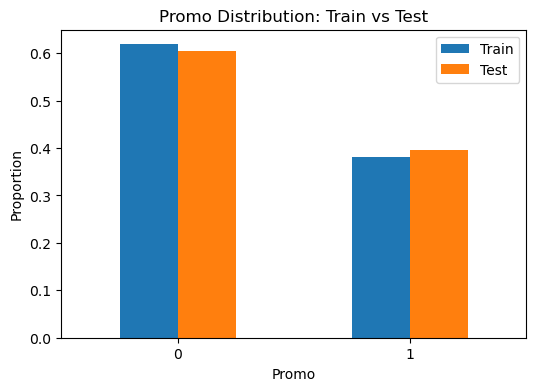

In [50]:
# Promotion distribution in train vs test sets

train_promo_dist = train["Promo"].value_counts(normalize=True)
test_promo_dist = test["Promo"].value_counts(normalize=True)

promo_dist = pd.DataFrame({
    "Train": train_promo_dist,
    "Test": test_promo_dist
})

promo_dist.plot(kind="bar", figsize=(6,4))
plt.title("Promo Distribution: Train vs Test")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

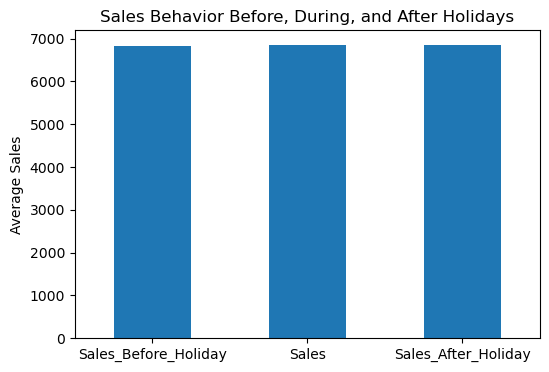

In [52]:
# Sales behavior before, during, and after holidays

# Keep only open days
df = df[df["Open"] == 1].copy()

# Createing holiday flag
df["IsHoliday"] = (df["StateHoliday"] != "0").astype(int)

# Creating lag & lead per store
df["Sales_Before_Holiday"] = df.groupby("Store")["Sales"].shift(1)
df["Sales_After_Holiday"] = df.groupby("Store")["Sales"].shift(-1)

# Aggregate only valid holiday rows
holiday_df = df[df["IsHoliday"] == 1][
    ["Sales_Before_Holiday", "Sales", "Sales_After_Holiday"]
].dropna()

holiday_comparison = holiday_df.mean()

# ploting
holiday_comparison.plot(kind="bar", figsize=(6,4))
plt.title("Sales Behavior Before, During, and After Holidays")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()

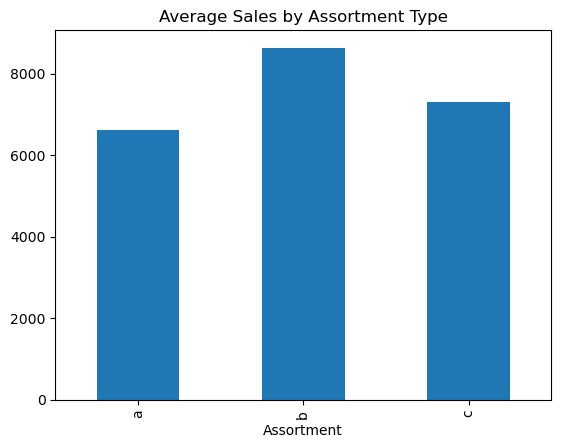

In [21]:
# Assortment vs Sales

df.groupby("Assortment")["Sales"].mean().plot(
    kind="bar",
    title="Average Sales by Assortment Type"
)
plt.show()

This plot compares the average sales across different assortment types. The Assortment variable represents the range and variety of products offered by a store, such as basic, extra, or extended assortments.

Product assortment directly influences customer choice and purchasing behavior. Stores with a wider assortment may attract more customers or encourage higher spending. Analyzing assortment types helps determine whether product variety is a significant factor in driving sales.

The bar chart shows that stores with larger or extended assortments generally achieve higher average sales compared to stores with limited assortments. This suggests that offering a wider range of products positively impacts revenue.

Assortment size influences sales performance, making the Assortment variable an important categorical feature for sales forecasting

/var/folders/4y/jgs7sbvs2n92vmw0q53pv0580000gn/T/ipykernel_87111/1108730945.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  competition_sales = df.groupby("CompetitionGroup")["Sales"].mean()


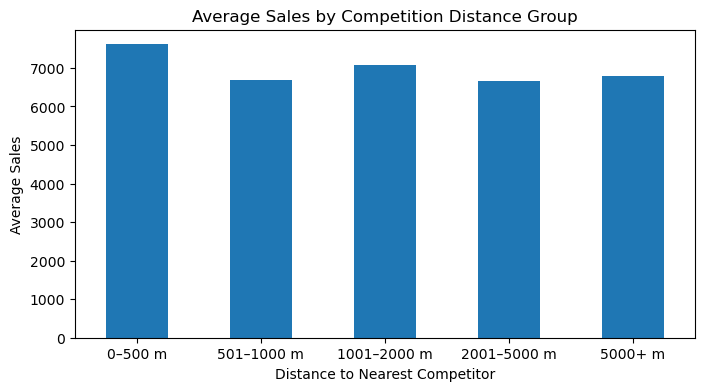

In [22]:
# Competition Distance vs Sales

# Create competition distance groups (in meters)
distance_bins = [0, 500, 1000, 2000, 5000, df["CompetitionDistance"].max()]
distance_labels = [
    "0–500 m", "501–1000 m", "1001–2000 m",
    "2001–5000 m", "5000+ m"
]

df["CompetitionGroup"] = pd.cut(
    df["CompetitionDistance"],
    bins=distance_bins,
    labels=distance_labels,
    include_lowest=True
)

# Calculate average sales per competition group
competition_sales = df.groupby("CompetitionGroup")["Sales"].mean()

# Plot
plt.figure(figsize=(8,4))
competition_sales.plot(kind="bar")
plt.xlabel("Distance to Nearest Competitor")
plt.ylabel("Average Sales")
plt.title("Average Sales by Competition Distance Group")
plt.xticks(rotation=0)
plt.show()

This plot examines how average sales vary with the distance to the nearest competitor. Competition distance is grouped into meaningful ranges to make the relationship easier to interpret.

The presence of nearby competitors can significantly influence a store’s sales by dividing customer demand. Instead of using a noisy scatter plot, competition distance was grouped into ranges to clearly understand how competitive proximity affects sales performance.

The bar chart shows that stores located farther away from competitors generally have higher average sales, while stores with nearby competitors tend to have lower sales. This indicates that competitive pressure negatively impacts sales.

Greater distance from competitors is associated with better sales performance, making competition distance an important numerical feature for sales prediction.


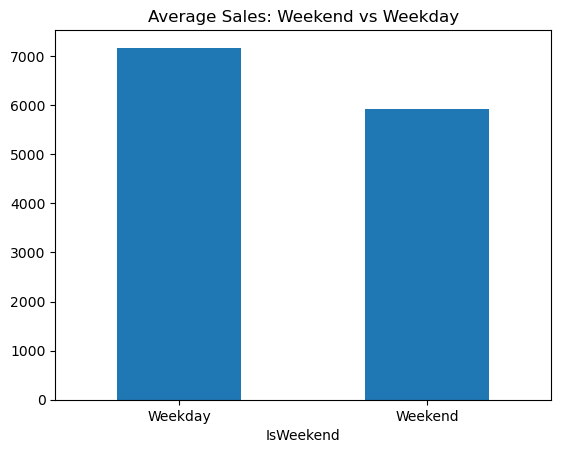

In [23]:
# weekend vs Weekday

df["IsWeekend"] = df["DayOfWeek"].isin([6, 7])

df.groupby("IsWeekend")["Sales"].mean().plot(
    kind="bar",
    title="Average Sales: Weekend vs Weekday"
)
plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)
plt.show()

This plot compares the average sales between weekdays and weekends. The IsWeekend variable is used to distinguish weekend days (Saturday and Sunday) from weekdays.

Customer shopping behavior often differs between weekdays and weekends due to variations in work schedules and leisure time. Understanding this difference helps determine whether the day type has a significant influence on sales and whether it should be included as a feature in the forecasting model.

The bar chart shows a clear difference in average sales between weekdays and weekends. This indicates that sales patterns are influenced by the day of the week, confirming the importance of time-based factors in sales behavior.

Weekend effects influence sales performance, making weekday/weekend information a valuable feature for sales prediction.

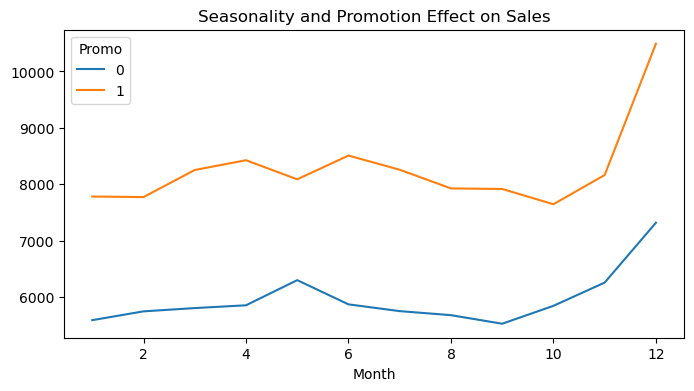

In [24]:
# Month + promo + sales

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

df.groupby(["Month", "Promo"])["Sales"].mean().unstack().plot(figsize=(8,4))
plt.title("Seasonality and Promotion Effect on Sales")
plt.show()

This plot analyzes how average sales vary across months while considering promotional status at the same time. It shows the combined effect of seasonality (Month) and promotions (Promo) on sales.

Sales are influenced by multiple factors simultaneously. While seasonality affects customer demand throughout the year, promotions can further amplify or reduce sales during specific periods. This multivariate analysis helps understand whether promotions are equally effective in all months or more impactful during certain seasons.

The line plot shows that:

* Sales vary across months, confirming seasonal patterns.
* Promotional sales are consistently higher than non-promotional sales across most months.
* The gap between promotional and non-promotional sales changes across months, indicating that promotions are more effective during certain seasons.

This means promotions and seasonality interact rather than acting independently.

Promotions amplify seasonal demand, and their impact varies by month. Timing promotions during high-demand seasons can maximize sales performance.

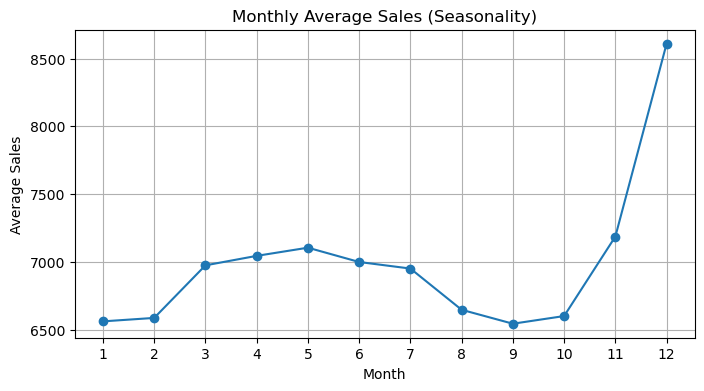

In [25]:
# Seasonality (Month-wise sales)

monthly_sales = df.groupby("Month")["Sales"].mean()

plt.figure(figsize=(8,4))
monthly_sales.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Monthly Average Sales (Seasonality)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

This plot shows the average sales for each month of the year. It is used to identify seasonal patterns in sales and understand how customer demand changes over time.

In retail businesses, sales often vary throughout the year due to factors such as festivals, holidays, weather conditions, and consumer buying behavior. Identifying these seasonal patterns is essential for sales forecasting, as models must account for time-based trends to make accurate predictions.

The line plot shows that average sales are not uniform across months. Some months consistently record higher sales, while others show lower values. This confirms the presence of seasonality in the data, meaning sales are influenced by the time of year.

Sales follow clear seasonal trends, making month-based features important for predicting future sales.

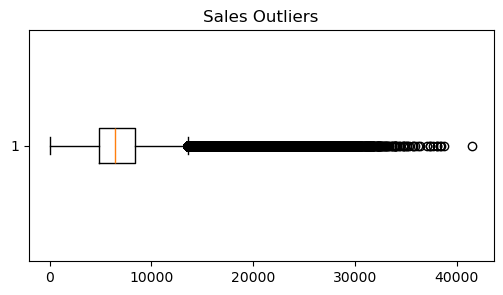

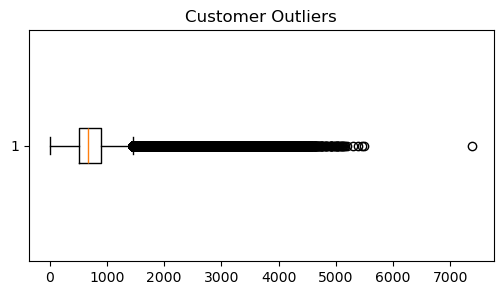

In [26]:
# OutLier Analysis

plt.figure(figsize=(6,3))
plt.boxplot(df["Sales"], vert=False)
plt.title("Sales Outliers")
plt.show()

plt.figure(figsize=(6,3))
plt.boxplot(df["Customers"], vert=False)
plt.title("Customer Outliers")
plt.show()

Outlier analysis is performed to identify extreme values in numerical variables such as Sales and Customers. Boxplots are used to visually detect observations that lie far from the typical range of values.

Outliers can significantly influence statistical summaries and machine learning models. Before deciding whether to remove or retain them, it is important to understand whether these extreme values represent data errors or genuine business scenarios.

Sales Outliers

The boxplot of sales displays the central distribution of sales values along with several extreme values beyond the whiskers. These points represent days with unusually high sales.

The presence of sales outliers indicates that some stores or days generate exceptionally high revenue. These values are not errors but represent high-performing stores or peak demand periods such as promotions or seasonal events.


Customer Outliers

The customer boxplot highlights days with exceptionally high customer footfall compared to the majority of observations.

Customer outliers correspond to stores experiencing unusually high numbers of visitors. This often occurs during promotions, holidays, or in large stores located in high-demand areas.


Outliers in sales and customers were retained because they represent genuine business behavior rather than data quality issues. Removing them could distort the true sales patterns and negatively impact model performance.

In [27]:
# IQR Detecation

Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Sales"] < Q1 - 1.5*IQR) | (df["Sales"] > Q3 + 1.5*IQR)]
print("Number of sales outliers:", outliers.shape[0])

Number of sales outliers: 30769


In [28]:
# Correlation 

# Select numerical columns for correlation analysis
numerical_cols = [
    "Sales",
    "Customers",
    "CompetitionDistance"
]

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

correlation_matrix

,Sales,Customers,CompetitionDistance
Sales,1.000000,0.823597,-0.035851
Customers,0.823597,1.000000,-0.147797
CompetitionDistance,-0.035851,-0.147797,1.000000


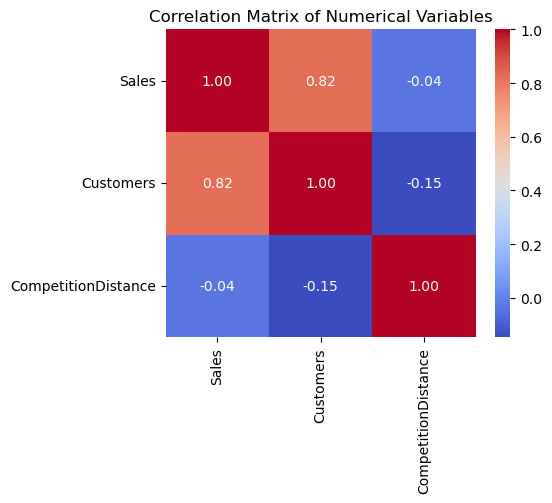

In [29]:
plt.figure(figsize=(5,4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

The correlation analysis shows a strong positive correlation between customers and sales, indicating that customer footfall is the primary driver of sales. Competition distance shows a weak negative correlation with sales, suggesting that closer competitors slightly reduce sales performance.

In [30]:
# Skewness

# Calculate skewness for key numerical variables
df[["Sales", "Customers", "CompetitionDistance"]].skew()

Sales                  1.593922
Customers              2.788110
CompetitionDistance    2.980060
dtype: float64

In [31]:
# clean data saved

df.to_csv("../data/processed_data/train_clean.csv", index=False)
print("Notebook 2 completed successfully")

Notebook 2 completed successfully
